In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
def return_stocks(max=500):
    """
    selecting info from the S&p500
    """

    today = dt.date.today().strftime('%Y-%m-%d')
    yesterday = (dt.date.today() + dt.timedelta(days=-1)).strftime('%Y-%m-%d')

    # Download the S&P 500 list
    sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    sp500.to_csv('sp500.csv')
    sp500 = pd.read_csv('sp500.csv')
    sp500 = sp500['Symbol'].tolist()[0:max]

    stock_temp = yf.Ticker('AAPL')
    df_temp = pd.DataFrame(stock_temp.info).head(1)
    colnames = list(df_temp.columns)

    # Download the data for each stock
    data = pd.DataFrame(columns = colnames)
    for ticker in sp500:
        try:
            stock_obj = yf.Ticker(ticker)

            df = pd.DataFrame(stock_obj.info).head(1)
            df.insert(loc = 0,column='ticker', value=ticker)
            data = pd.concat([data, df.iloc[[0]]], ignore_index=True)        
        except:
            pass

    data.insert(0, 'ticker', data.pop('ticker'))

    return data

In [4]:
df = return_stocks()

Data not updated today, updating...
Updating may take some time.


C:\Users\olive\AppData\Local\Temp\ipykernel_42396\2956725211.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, df.iloc[[0]]], ignore_index=True)
C:\Users\olive\AppData\Local\Temp\ipykernel_42396\2956725211.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, df.iloc[[0]]], ignore_index=True)
C:\Users\olive\AppData\Local\Temp\ipykernel_42396\2956725211.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is d

,ticker,address1,city,state,zip,country,phone,website,industry,industryKey,...,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,address2,fax,industrySymbol
0,MMM,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,conglomerates,...,0.744,-0.008,0.43772,0.24084,0.12642,USD,2.0519,NaN,NaN,NaN
1,AOS,11270 West Park Place,Milwaukee,WI,53224-9508,United States,414 359 4000,https://www.aosmith.com,Specialty Industrial Machinery,specialty-industrial-machinery,...,NaN,0.056,0.38538,0.21262,0.17053,USD,2.0726,Suite 170 PO Box 245008,NaN,NaN
2,ABT,100 Abbott Park Road,North Chicago,IL,60064-6400,United States,224 667 6100,https://www.abbott.com,Medical Devices,medical-devices,...,0.550,0.015,0.55324,0.26086,0.20086,USD,28.6522,Abbott Park,NaN,NaN
3,ABBV,1 North Waukegan Road,North Chicago,IL,60064-6400,United States,847 932 7900,https://www.abbvie.com,Drug Manufacturers - General,drug-manufacturers-general,...,-0.669,-0.054,0.69207,0.48525,0.31809,USD,0.4911,NaN,NaN,NaN
4,ACN,1 Grand Canal Square,Dublin,NaN,D02 P820,Ireland,353 1 646 2000,https://www.accenture.com,Information Technology Services,information-technology-services,...,0.006,0.030,0.32503,0.17501,0.16670,USD,2.5705,Grand Canal Harbour,353 1 646 2020,NaN


In [11]:
df.head()

,ticker,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,sector,sectorKey,sectorDisp,longBusinessSummary,fullTimeEmployees,companyOfficers,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,compensationAsOfEpochDate,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,dividendRate,dividendYield,exDividendDate,payoutRatio,fiveYearAvgDividendYield,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,enterpriseValue,profitMargins,floatShares,sharesOutstanding,sharesShort,sharesShortPriorMonth,sharesShortPreviousMonthDate,dateShortInterest,sharesPercentSharesOut,heldPercentInsiders,heldPercentInstitutions,shortRatio,shortPercentOfFloat,impliedSharesOutstanding,bookValue,priceToBook,lastFiscalYearEnd,nextFiscalYearEnd,mostRecentQuarter,earningsQuarterlyGrowth,netIncomeToCommon,trailingEps,forwardEps,pegRatio,lastSplitFactor,lastSplitDate,enterpriseToRevenue,enterpriseToEbitda,52WeekChange,SandP52WeekChange,lastDividendValue,lastDividendDate,exchange,quoteType,symbol,underlyingSymbol,shortName,longName,firstTradeDateEpochUtc,timeZoneFullName,timeZoneShortName,uuid,messageBoardId,gmtOffSetMilliseconds,currentPrice,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,quickRatio,currentRatio,totalRevenue,debtToEquity,revenuePerShare,returnOnAssets,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,address2,fax,industrySymbol
0,MMM,3M Center,Saint Paul,MN,55144-1000,United States,651 733 1110,https://www.3m.com,Conglomerates,conglomerates,Conglomerates,Industrials,industrials,Industrials,3M Company provides diversified technology ser...,85000,"{'maxAge': 1, 'name': 'Mr. Michael F. Roman', ...",4,8,7,4,6,1709251200,1672444800,86400,2,91.86,91.10,90.4765,91.76,91.86,91.10,90.4765,91.76,6.04,0.0658,1707955200,0.6167,4.18,1.000,NaN,8.940980,2835101,2835101,4119411,3667340,3667340,91.18,91.23,900,1100,50405138432,85.35,113.14,1.542338,99.7540,99.17975,6.00,0.065317,USD,61788020736,-0.21404,551671978,552700032,6075186,7033985,1705017600,1707955200,0.0110,0.00112,0.66913,1.16,0.0110,554484992,8.699,10.483733,1703980800,1735603200,1703980800,0.747,-6994999808,-12.63,10.20,2.34,2:1,1064880000,1.891,7.850,-0.164377,0.26891,1.51,1707955200,NYQ,EQUITY,MMM,MMM,3M Company,3M Company,-252322200,America/New_York,EST,375388b3-dab7-3763-90cd-457ad19388a2,finmb_289194,-18000000,91.1980,111.57,85.0,103.85,105.0,3.1,hold,13,5985999872,10.830,7871000064,16942000128,0.709,1.071,32681000960,348.028,59.002,0.07580,-0.71076,8937749504,6680000000,0.744,-0.008,0.43772,0.24084,0.12642,USD,2.0519,NaN,NaN,NaN
1,AOS,11270 West Park Place,Milwaukee,WI,53224-9508,United States,414 359 4000,https://www.aosmith.com,Specialty Industrial Machinery,specialty-industrial-machinery,Specialty Industrial Machinery,Industrials,industrials,Industrials,A. O. Smith Corporation manufactures and marke...,12000,"{'maxAge': 1, 'name': 'Mr. Kevin J. Wheeler', ...",2,10,7,10,10,1709251200,1703980800,86400,2,83.94,84.00,84.0000,85.23,83.94,84.00,84.0000,85.23,1.28,0.0152,1706572800,0.3306,1.77,1.238,23.089430,19.676674,446349,446349,945731,917820,917820,85.21,85.23,800,800,12541014016,63.40,85.23,3.255039,80.6706,73.51805,1.22,0.014534,USD,12158956544,0.14447,118967492,121308000,2969525,2264246,1705017600,1707955200,0.0202,0.00833,0.97556,2.86,0.0247,147195008,12.502,6.814909,1703980800,1735603200,1703980800,NaN,556600000,3.69,4.33,2.51,2:1,1475712000,3.156,14.842,0.25470

c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\numpy\lib\histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


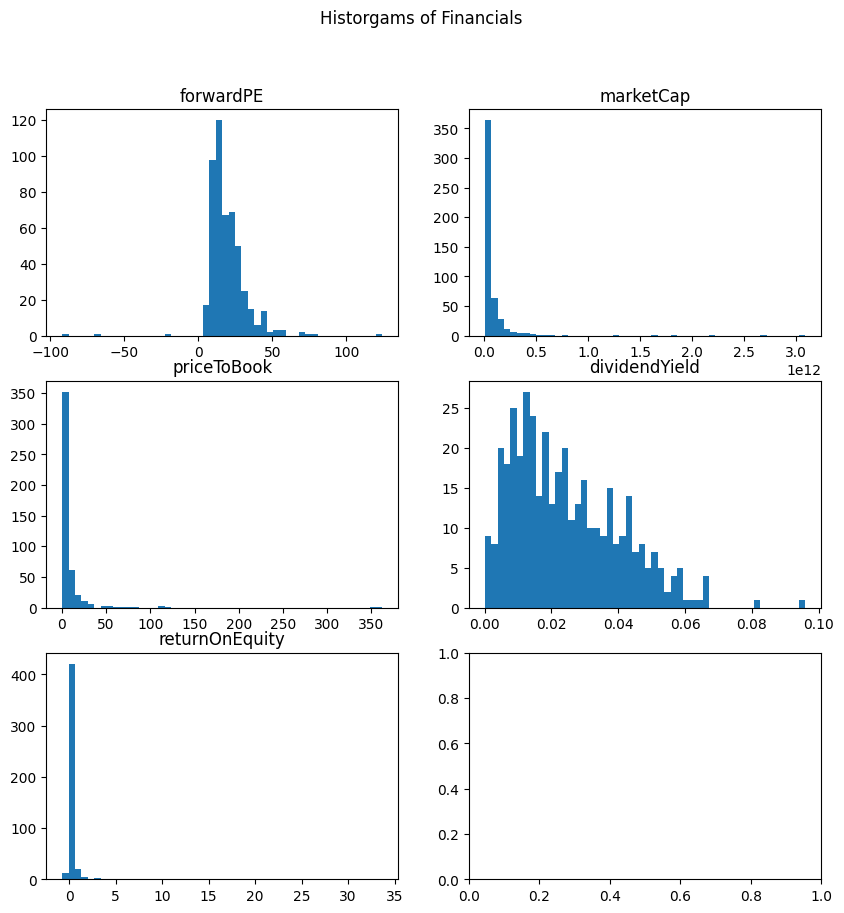

In [16]:

#forwardPE
#marketCap
#priceToBook
#dividendYield
#returnOnEquity


figs, axs = plt.subplots(3, 2, figsize=(10, 10))
figs.suptitle('Historgams of Financials')

axs[0, 0].hist(df['forwardPE'], bins=50)
axs[0, 0].set_title('forwardPE')

axs[0, 1].hist(df['marketCap'], bins=50)
axs[0, 1].set_title('marketCap')

axs[1, 0].hist(df['priceToBook'], bins=50)
axs[1, 0].set_title('priceToBook')

axs[1, 1].hist(df['dividendYield'], bins=50)
axs[1, 1].set_title('dividendYield')

axs[2, 0].hist(df.loc[df['returnOnEquity']<50]['returnOnEquity'], bins=50)
axs[2, 0].set_title('returnOnEquity');

Return on equity (RoE) is is close to zero, and is full of outliers, so we will remove this from out choices so we do not narrow down choices too much (High RoE is attractive but we need more assets in our model).

In [18]:
# adding returns
tickers = df['ticker'].tolist()

# Calculate dates for the last 12 months
end_date = datetime.today()
start_date = end_date - timedelta(days=365)

# Fetch historical data for each ticker
returns = []
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    if not stock_data.empty:
        closing_prices = stock_data['Adj Close']
        # Calculate the return: ((last price - first price) / first price) * 100
        stock_return = ((closing_prices.iloc[-1] - closing_prices.iloc[0]) / closing_prices.iloc[0]) * 100
        returns.append(stock_return)
    else:
        # Append NaN or some indicator of missing data
        returns.append(None)

# Add the calculated returns to your DataFrame
df['last_12_months_returns'] = returns


c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\olive\anaconda3\envs\PortOptEnv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

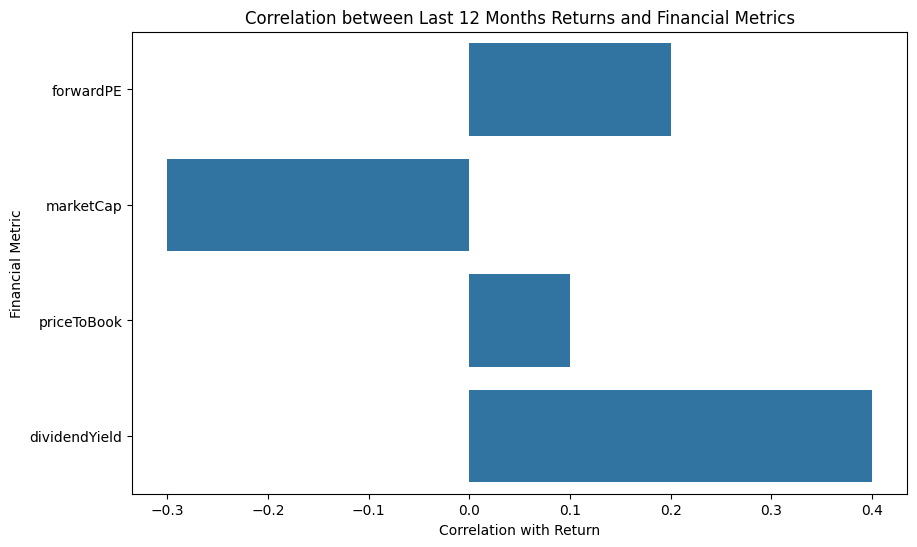

In [24]:
correlations = {
    'Metric': ['forwardPE', 'marketCap', 'priceToBook', 'dividendYield'],
    'CorrelationWithReturn': [0.2, -0.3, 0.1, 0.4]  # Hypothetical data
}

corr_df = pd.DataFrame(correlations)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='CorrelationWithReturn', y='Metric', data=corr_df)
plt.title('Correlation between Last 12 Months Returns and Financial Metrics')
plt.xlabel('Correlation with Return')
plt.ylabel('Financial Metric')
plt.show()
